In [1]:
from pathlib import Path
from ecglib.data import load_ptb_xl, load_physionet2020
from ecglib.data import EcgDataset
import pandas as pd

In [2]:
from paths import data_dir

In [6]:
(data_dir/'physionet2020').mkdir(exist_ok=True, parents=True)

In [3]:
data_dir, data_dir.exists()

(Path('C:/Users/lenovo/Desktop/sci/data/ecg'), True)

In [4]:
path_to_zip = data_dir / 'ptb_xl'
frequency = 500

# Download PTB-XL data

In [57]:
#ptb_xl_info = load_ptb_xl(download=True, path_to_zip=path_to_zip, path_to_unzip=path_to_zip)

In [1]:
#physionet2020_info = load_physionet2020(download=True, path_to_zip=data_dir/'physionet2020', path_to_unzip=data_dir/'physionet2020')

# Loading PTB-XL data

In [58]:
ptb_xl_info = pd.read_csv(path_to_zip / "ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2" / "ptbxl_database.csv")

In [59]:
ptb_xl_info["fpath"] = [
    str(path_to_zip / "ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2" / filename)
    for filename in ptb_xl_info["filename_hr"]
]
ptb_xl_info['frequency'] = frequency

In [60]:
ptb_xl_info['device'].isna().sum()

np.int64(0)

In [61]:
ptb_xl_info.columns

Index(['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight', 'nurse',
       'site', 'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr',
       'r_peaks', 'RS-LVH', 'S12-LVH', 'R56-LVH', 'QRS-LVH', 'LI-LVH',
       'SLI-LVH', 'QRS-CLBB', 'ST-ELEV-MI', 'ST-DEPR-MI', 'Q-ISC',
       'Q-ISC-QPeak', 'Q-ISC-V2V3', 'Q-ISC-RPeak', 'STRAIN', 'MI-ALL', 'fpath',
       'frequency'],
      dtype='object')

In [62]:
ptb_xl_info['scp_codes']

0                        {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
1                                    {'NORM': 80.0, 'SBRAD': 0.0}
2                                      {'NORM': 100.0, 'SR': 0.0}
3                                      {'NORM': 100.0, 'SR': 0.0}
4                                      {'NORM': 100.0, 'SR': 0.0}
                                   ...                           
21796    {'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'STACH': 0.0}
21797                    {'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}
21798                                  {'ISCAS': 50.0, 'SR': 0.0}
21799                                  {'NORM': 100.0, 'SR': 0.0}
21800                                  {'NORM': 100.0, 'SR': 0.0}
Name: scp_codes, Length: 21801, dtype: object

In [30]:
ptb_xl_info['scp_codes']

0                        {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
1                                    {'NORM': 80.0, 'SBRAD': 0.0}
2                                      {'NORM': 100.0, 'SR': 0.0}
3                                      {'NORM': 100.0, 'SR': 0.0}
4                                      {'NORM': 100.0, 'SR': 0.0}
                                   ...                           
21796    {'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'STACH': 0.0}
21797                    {'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}
21798                                  {'ISCAS': 50.0, 'SR': 0.0}
21799                                  {'NORM': 100.0, 'SR': 0.0}
21800                                  {'NORM': 100.0, 'SR': 0.0}
Name: scp_codes, Length: 21801, dtype: object

In [28]:
ptb_xl_info['strat_fold']

0        3
1        2
2        5
3        3
4        4
        ..
21796    7
21797    4
21798    2
21799    8
21800    9
Name: strat_fold, Length: 21801, dtype: int64

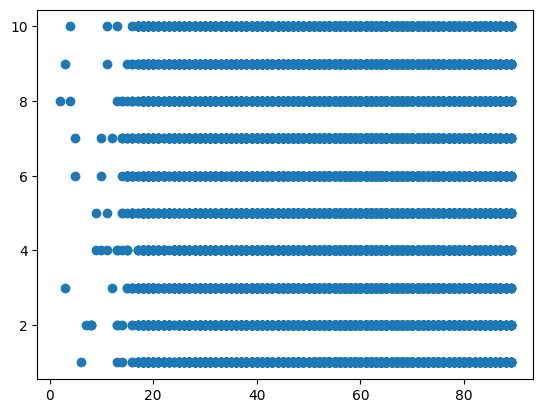

In [63]:
import matplotlib.pyplot as plt

plt.scatter(ptb_xl_info['age'][ptb_xl_info['age'] < 300], ptb_xl_info['strat_fold'][ptb_xl_info['age'] < 300])

In [64]:
ptb_xl_info['heart_axis']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
21796    LAD
21797    MID
21798    MID
21799    LAD
21800    MID
Name: heart_axis, Length: 21801, dtype: object

In [66]:
targets = [
    [0.0] if 'AFIB' in eval(ptb_xl_info.iloc[i]['scp_codes']).keys() else [1.0] 
           for i in range(ptb_xl_info.shape[0])
]

In [67]:
ecg_data = EcgDataset(ecg_data=ptb_xl_info, target=targets, frequency=frequency, leads=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [68]:
ecg_data.ecg_data


,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,ST-ELEV-MI,ST-DEPR-MI,Q-ISC,Q-ISC-QPeak,Q-ISC-V2V3,Q-ISC-RPeak,STRAIN,MI-ALL,fpath,frequency
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00001_hr,500
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00002_hr,500
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00003_hr,500
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00004_hr,500
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00005_hr,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21796,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,False,True,False,False,False,False,False,True,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\21000\21833_hr,500
21797,21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\21000\21834_hr,500
21798,21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\21000\21835_hr,500
21799,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\21000\21836_hr,500


In [69]:
ecg_data[50][1][0][0].shape

torch.Size([12, 5000])

In [70]:
import wfdb
import numpy as np 

def load_full_length_ecg(ecg_dataset, index):
    ecg_frequency = float(ecg_dataset.ecg_data.iloc[index]["frequency"])
    file_path = ecg_dataset.ecg_data.iloc[index]["fpath"]
    
    if ecg_dataset.data_type == "npz":
        ecg_record = np.load(file_path)["arr_0"].astype("float64")
    elif ecg_dataset.data_type == "wfdb":
        ecg_record, _ = wfdb.rdsamp(file_path, channels=ecg_dataset.leads)
        ecg_record = ecg_record.T.astype("float64")
    
    return ecg_record, ecg_frequency

sample, _ = load_full_length_ecg(ecg_data, 50)
sample

array([[-0.045, -0.045, -0.045, ...,  0.085,  0.085,  0.085],
       [-0.005, -0.005, -0.005, ..., -0.025, -0.025, -0.025],
       [ 0.04 ,  0.04 ,  0.04 , ..., -0.11 , -0.11 , -0.11 ],
       ...,
       [-0.075, -0.075, -0.075, ...,  0.145,  0.145,  0.145],
       [-0.105, -0.105, -0.105, ...,  0.1  ,  0.1  ,  0.1  ],
       [-0.09 , -0.09 , -0.09 , ...,  0.09 ,  0.09 ,  0.09 ]],
      shape=(12, 5000))

In [ ]:
sample.shape

(12, 5000)

# Preparing NPZ

In [71]:
import os
import numpy as np
from tqdm import tqdm
from ecglib.preprocessing import BaselineWanderRemoval, IIRNotchFilter, ButterworthFilter

class EcgFiltering:
    def __init__(self, fs=500):
        self.fs = fs
        
    def __call__(self, ecg_record):
        signal = ecg_record
        
        baseline_filter = BaselineWanderRemoval()
        signal = baseline_filter(signal)
        notch_filter = IIRNotchFilter(w0=50, Q=30, fs=self.fs)
        signal = notch_filter(signal)
        
        bandpass_filter = ButterworthFilter(
            filter_type='bandpass',
            fs=self.fs,
            n=3,
            Wn=[0.5, 45],
        )
        signal = bandpass_filter(signal)

        return signal

In [72]:
def convert_signal_to_np(sample, filtering):
    signal_tensor = sample[1][0][0]
    signal_np = signal_tensor.numpy()
    processed_signal = filtering(signal_np)
    target = sample[1][1].item()
    
    return processed_signal, target

def preprocess_sample(idx, filtering):
    sample = ecg_data[idx]
    signal = sample[1][0][0].numpy()
    processed_signal = filtering(signal)
    return processed_signal

In [73]:
import matplotlib.pyplot as plt
def plot_ecg_comparison(raw, processed, lead=0):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(raw[lead], 'b')
    plt.title(f'Сырой сигнал (Отведение {lead+1})')
    plt.xlabel('Отсчеты')
    plt.ylabel('Амплитуда')
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(processed[lead], 'r')
    plt.title(f'Обработанный сигнал (Отведение {lead+1})')
    plt.xlabel('Отсчеты')
    plt.ylabel('Амплитуда')
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig("ecg_comparison.png")
    plt.show()

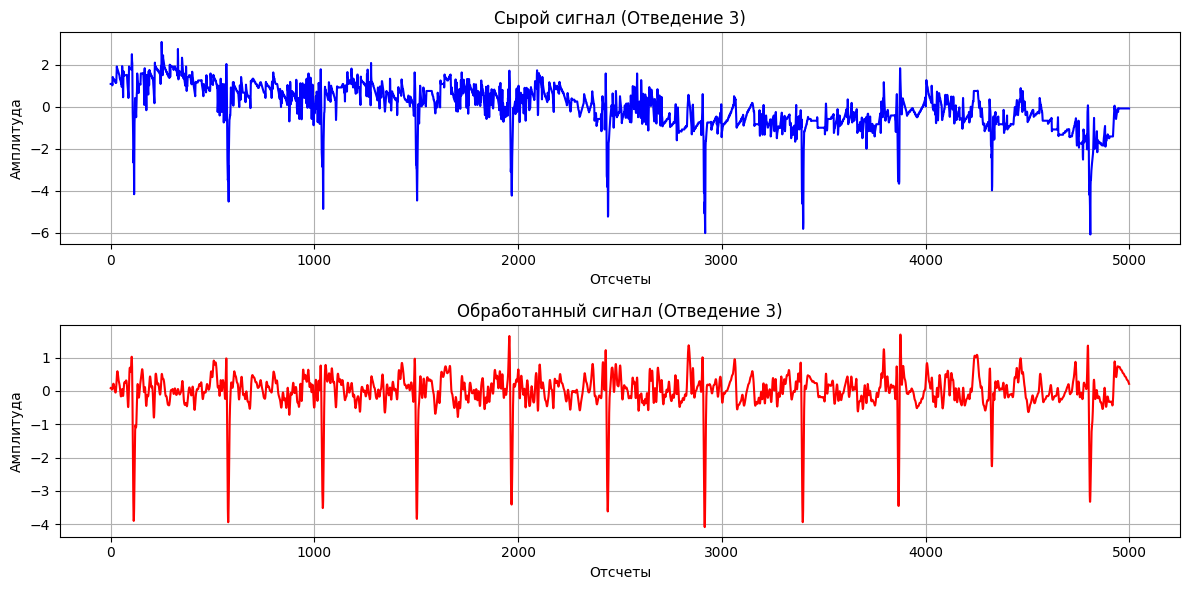

In [74]:
filtering = EcgFiltering(fs=500)
processed_signal = preprocess_sample(0, filtering)


raw_sample = ecg_data[0][1][0][0].numpy()
plot_ecg_comparison(raw_sample, processed_signal, lead=2)

In [43]:
ecg_data.ecg_data

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,ST-ELEV-MI,ST-DEPR-MI,Q-ISC,Q-ISC-QPeak,Q-ISC-V2V3,Q-ISC-RPeak,STRAIN,MI-ALL,fpath,frequency
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00001_hr,500
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00002_hr,500
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00003_hr,500
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00004_hr,500
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00005_hr,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21796,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,False,True,False,False,False,False,False,True,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\21000\21833_hr,500
21797,21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\21000\21834_hr,500
21798,21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\21000\21835_hr,500
21799,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\21000\21836_hr,500


In [75]:
filtering = EcgFiltering(fs=500)


def process_and_save_all(ecg_data, filtering, output_dir="ptb_xl_npz"):
    output_path = Path(output_dir)
    output_path.mkdir(parents=True, exist_ok=True)
    
    success_count = 0
    error_indices = []
    
    for idx in tqdm(range(len(ecg_data)), desc="ЭКГ"):
        try:
            sample = ecg_data[idx]
            #print(sample, filtering)
            processed_signal, target = convert_signal_to_np(sample, filtering)
            #print(processed_signal)
            patient_id=int(ecg_data.ecg_data.iloc[idx]['patient_id'])
            file_path = output_path / f"ecg_{patient_id}.npz"
            np.savez(
                file_path,
                signal=processed_signal,
                target=target,
                patient_id=patient_id,
                age = ecg_data.ecg_data.iloc[idx]['age'],
                sex = int(ecg_data.ecg_data.iloc[idx]['sex']),
                pacemaker = ecg_data.ecg_data.iloc[idx]['pacemaker'],
                strat_fold = int(ecg_data.ecg_data.iloc[idx]['strat_fold']),
                heart_axis = ecg_data.ecg_data.iloc[idx]['heart_axis'],
                scp_codes = ecg_data.ecg_data.iloc[idx]['scp_codes'],
                index=idx
            )            
            success_count += 1
            
        except Exception as e:
            error_indices.append(idx)
            print(f"\nОшибка при обработке записи {idx}: {str(e)}")
    
process_and_save_all(ecg_data, filtering, path_to_zip / 'ptb_xl' / 'ptb_xl_npz')

ЭКГ:  58%|█████▊    | 12696/21801 [08:31<05:59, 25.35it/s]


Ошибка при обработке записи 12692: ecg_record = [[-0.27456758 -0.27456758 -0.27456758 ...  0.08949671  0.08949671
   0.08949671]
 [ 0.28035922  0.28035922  0.28035922 ...  0.74385482  0.74385482
   0.74385482]
 [ 1.05686532  1.05686532  1.05686532 ...  1.28258642  1.28258642
   1.28258642]
 ...
 [ 2.31690088  2.31690088  2.31690088 ... -0.09362764 -0.09362764
  -0.09362764]
 [        nan         nan         nan ...         nan         nan
          nan]
 [-0.01714994 -0.01714994 -0.01714994 ... -0.01714994 -0.01714994
  -0.01714994]], index = 12692


ЭКГ: 100%|██████████| 21801/21801 [14:34<00:00, 24.93it/s]


# Getting features

In [ ]:
import pandas as pd
import neurokit2 as nk
import numpy as np
from pathlib import Path
from tqdm import tqdm

processed_dir = Path('ptb_xl_npz')
channal_names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
fs = 500

def calc_ecg_analyze_features(signals, fs):
    ecg_analysis = pd.Series(dtype=float)
    try:
        ecg_analysis = nk.ecg_analyze(signals, sampling_rate=fs)
    except Exception as e:
        print(f"Error in ecg_analyze: {e}")

    return ecg_analysis

def calc_hrv_time_features(info, fs):
    hrv_time = pd.Series(dtype=float)
    try:
        hrv_time = nk.hrv_time(info["ECG_R_Peaks"], sampling_rate=fs)
    except Exception as e:
        print(f"Error in hrv_time: {e}")

    return hrv_time

def calc_hrv_nonlinear_features(info, fs):
    hrv_nonlin = pd.Series(dtype=float)
    try:
        hrv_nonlin = nk.hrv_nonlinear(info["ECG_R_Peaks"], sampling_rate=fs)
    except Exception as e:
        print(f"Error in hrv_nonlinear: {e}")

    return hrv_nonlin

def calc_hrv_rsa_features(signals, fs):
    hrv_rsa = pd.Series(dtype=float)
    try:
        hrv_rsa = nk.hrv_rsa(signals, sampling_rate=fs)
    except Exception as e:
        print(f"Error in hrv_rsa: {e}")
    return hrv_rsa

def calc_hrv_rqa_features(info, fs):
    hrv_rqa = pd.Series(dtype=float)
    try:
        hrv_rqa = nk.hrv_rqa(info["ECG_R_Peaks"], sampling_rate=fs)
    except Exception as e:
        print(f"Error in hrv_rqa: {e}")
    return hrv_rqa


def extract_nk_features(signal_lead, fs):
    features_series = pd.Series(dtype=float)

    try:
        cleaned = nk.ecg_clean(signal_lead, sampling_rate=fs)
        signals, info = nk.ecg_process(cleaned, sampling_rate=fs)

        ecg_analysis = calc_ecg_analyze_features(signals, fs)
        hrv_time = calc_hrv_time_features(info, fs)
        hrv_nonlin = calc_hrv_nonlinear_features(info, fs)
        #hrv_rsa = calc_hrv_rsa_features(signals, fs)
        hrv_rqa = calc_hrv_rqa_features(info, fs)
        #pqrst_features = get_pqrst_features(cleaned, info["ECG_R_Peaks"], fs)

        features_series = pd.concat([
            ecg_analysis.iloc[0],
            hrv_time.iloc[0],
            hrv_nonlin.iloc[0],
            #hrv_rsa.iloc[0],
            hrv_rqa.iloc[0],
            #pqrst_features
        ], axis=0)
        """duplicates = features_series.index[features_series.index.duplicated()].unique()
        for idx in duplicates:
            print(f"📌 Индекс: {idx}")
            print(features_series.loc[[idx]])
            print("-" * 40)"""
        features_series = features_series[~features_series.index.duplicated(keep='first')]
    except:
        pass

    return features_series

def extract_lead_features(signal_lead, chanal_name):
    nk_series = extract_nk_features(signal_lead, fs)
    #print(chanal_name, pd.Series(nk_series.index).value_counts())
    nk_series.index = [f"{feature_name}_{chanal_name}" for feature_name in nk_series.index]
    
    #duplicates = nk_series.index[nk_series.index.duplicated()].unique()
    #for idx in duplicates:
    #    print(f"📌 Индекс: {idx}")
    #    print(nk_series.loc[[idx]])
    #    print("-" * 40)
    return nk_series

def process_patient_file(file_path):
    data = np.load(file_path, allow_pickle=True)
    signal = data['signal']

    features_series = pd.Series({
        'patient_id': data['patient_id'].item(),
        'target': data['target'].item() if 'target' in data else np.nan,
        'file_name': Path(file_path).name,
        'age': data['age'].item(),
        'sex': data['sex'].item(),
    })
    
    for i, channal_name in enumerate(channal_names):
        lead_signal = signal[i]
        channal_features = extract_lead_features(lead_signal, channal_name)
        if not channal_features.empty:
            features_series = pd.concat([features_series, channal_features])
    
    return features_series

def extract_scalar(value):
    if isinstance(value, (list, np.ndarray)):
        try:
            while isinstance(value, (list, np.ndarray)):
                value = value[0]
            return value
        except IndexError:
            return np.nan
    else:
        return value 

"""def process_all_patients(processed_dir):
    npz_files = list(processed_dir.glob("*.npz"))
    print(f"Found {len(npz_files)} patient files")
    all_features_df = pd.DataFrame(index=range(len(npz_files)))
    for idx, file_path in enumerate(tqdm(npz_files, desc="Processing patients")):
        features = process_patient_file(str(file_path))
        features_df = features.to_frame().T
        #output_filename = f"{file_path.stem}_features.parquet"
        #output_path = output_dir / output_filename
        for col in features_df.columns:
            features_df[col] = features_df[col].apply(extract_scalar)
        all_features_df.loc[idx, features_df.columns] = features_df.iloc[0]

    output_dir = processed_dir.parent / 'ptb_xl_features'
    output_dir.mkdir(parents=True, exist_ok=True)
    all_features_df.to_parquet(output_dir / "all_patient_features.parquet", index=False)"""


def process_all_patients(processed_dir, batch_size=2000):
    npz_files = list(processed_dir.glob("*.npz"))
    print(f"Found {len(npz_files)} patient files")
    all_features_df = pd.DataFrame()
    
    output_dir = processed_dir.parent / 'ptb_xl_features'
    output_dir.mkdir(parents=True, exist_ok=True)
    
    for idx, file_path in enumerate(tqdm(npz_files, desc="Processing patients")):
        features = process_patient_file(str(file_path))
        features_df = features.to_frame().T
        
        for col in features_df.columns:
            features_df[col] = features_df[col].apply(extract_scalar)
        
        all_features_df = pd.concat([all_features_df, features_df], ignore_index=True)
        
        # Сохраняем батч каждые batch_size пациентов или в конце
        if (idx + 1) % batch_size == 0 or (idx + 1) == len(npz_files):
            start_idx = (idx // batch_size) * batch_size
            end_idx = idx
            batch_filename = f"patient_features_{start_idx + 1}_to_{end_idx + 1}.parquet"
            batch_path = output_dir / batch_filename
            all_features_df.to_parquet(batch_path, index=False)
            print(f"Saved batch {batch_filename}")
            all_features_df = pd.DataFrame()  # Сбрасываем DataFrame для следующего батча
    
    # Сохраняем последний батч, если он не пустой
    if not all_features_df.empty:
        start_idx = (len(npz_files) // batch_size) * batch_size
        end_idx = len(npz_files) - 1
        batch_filename = f"patient_features_{start_idx + 1}_to_{end_idx + 1}.parquet"
        batch_path = output_dir / batch_filename
        all_features_df.to_parquet(batch_path, index=False)
        print(f"Saved final batch {batch_filename}")

process_all_patients(path_to_zip / 'ptb_xl_npz')

Found 18868 patient files


Processing patients:   0%|          | 0/18868 [00:00<?, ?it/s]c:\Users\lenovo\Desktop\sci\unn\ecg\venv_ecg\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:536: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\lenovo\Desktop\sci\unn\ecg\venv_ecg\Lib\site-packages\neurokit2\complexity\entropy_multiscale.py:349: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
c:\Users\lenovo\Desktop\sci\unn\ecg\venv_ecg\Lib\site-packages\neurokit2\complexity\optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
c:\Users\lenovo\Desktop\sci\unn\ecg\venv_ecg\Lib\site-packages\neurokit2\complexity\optim_complexity_k.py:135: RuntimeWar

In [ ]:
from ecglib.preprocessing import (
    Compose,
    IIRNotchFilter,
    ButterworthFilter,
    BaselineWanderRemoval,
    Normalization
)

preprocessing_pipeline = Compose([
    BaselineWanderRemoval(),
    IIRNotchFilter(freq=50, fs=500),
    ButterworthFilter(
        order=3,
        lowcut=0.5,
        highcut=45,
        btype='bandpass',
        fs=500
    ),  # полосовая фильтрация
    AutoScale(),  # автоматическое масштабирование
    Normalization(norm_type='minmax')  # нормализация [0, 1]
])

# Применение препроцессинга ко всему датасету
processed_dataset = ecg_data.transform(preprocessing_pipeline)

In [ ]:
import numpy as np
from ecglib.preprocessing import Compose, OneOf, SomeOf
from ecglib.preprocessing import (
    FrequencyResample,
    Normalization,
    ButterworthFilter,
    IIRNotchFilter,
    BaselineWanderRemoval,
    WaveletTransform,
    ConvexAug,
    Padding
)

# 1. Создадим конвейер препроцессинга
preprocessing_pipeline = Compose(
    transforms=[
        # Изменение частоты дискретизации
        #FrequencyResample(ecg_frequency=500, requested_frequency=250),
        
        # Удаление базового дрейфа
        BaselineWanderRemoval(leads=[0, 1, 2, 3], wavelet='db4'),
        
        # Фильтрация: один из вариантов
        OneOf(
            transforms=[
                ButterworthFilter(
                    filter_type='bandpass',
                    leads=list(range(12)),
                    Wn=[0.5, 45],
                    fs=500
                ),
                IIRNotchFilter(
                    leads=list(range(12)),
                    w0=50,
                    Q=30,
                    fs=500
                )
            ],
            transform_prob=[0.7, 0.3]
        ),
        
        # Вейвлет-преобразование
        WaveletTransform(
            wt_type='DWT',
            leads=[0, 1],
            wavelet='sym5',
            level=4,
            threshold=1.5
        ),
        
        # Нормализация
        Normalization(norm_type='min_max'),
        
        # Аугментация выпуклой комбинацией
        ConvexAug(leads=[4, 5]),
        
        # Добавление паддинга
        Padding(observed_ecg_length=10, frequency=250)
    ],
    p=1.0  # Вероятность применения всего конвейера
)